In [1]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드 및 전처리

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train.shape : (60000, 28, 28)
# 28 × 28 크기의 이미지 60000개

# 새로운 축 추가 : (60000, 28, 28, 1)
# Tensor 모양은 반드시 (개수, 사이즈, 사이즈, 채널)의 형태
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

11501568/11490434 [==============================] - 0s 0us/step


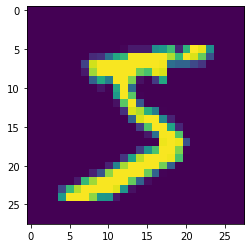

In [3]:
plt.imshow(x_train[0,:,:,0]);

In [4]:
# Normalization
# 0 ~ 1 사이의 값으로 변환
x_train, x_test = x_train/255.0, x_test/255.0 

## 모델 구성 및 컴파일

In [5]:
num_classes=10
epochs = 30
batch_size=32

In [6]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5,self).__init__()
        self.conv1 = Conv2D(6, kernel_size=(5,5), padding='same', activation='relu')
        self.conv2 = Conv2D(16, kernel_size=(5,5), activation='relu')
        self.max_pool = MaxPool2D(pool_size=(2,2))
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')
        
    def call(self, input_data):
        # input_data > conv1 > max_pool : x
        x = self.max_pool(self.conv1(input_data))
        # max_pooled x > conv2 > max_pool > x
        x = self.max_pool(self.conv2(x))
        # max_pooled x > flatten > x
        x = self.flatten(x)
        # flattened x > dense1 > dense2 > dense3 > x
        x = self.dense3(self.dense2(self.dense1(x)))
        # return processed x
        return x

In [7]:
model=LeNet5(num_classes)

2022-09-05 15:25:04.066149: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              # 클래스 분포에 맞을 경우 sparse_categorical_entropy
              # 10개 클래스에 레이블 각각 존재하므로 위의 loss 사용
              metrics=['accuracy'])

In [9]:
callbacks=[EarlyStopping(patience=3, monitor='val_loss'),
           # 3번의 epoch 진행 동안 val_loss 값 관찰하여 EarlyStopping 적용
           TensorBoard(log_dir='./logs', histogram_freq=1)]

2022-09-05 15:25:04.332694: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-05 15:25:04.332843: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-05 15:25:04.334266: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


## 모델 학습 및 평가

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test),
          callbacks=callbacks)

2022-09-05 15:25:04.764591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
  19/1875 [..............................] - ETA: 18s - loss: 2.2250 - accuracy: 0.2961

2022-09-05 15:25:05.721256: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-05 15:25:05.721438: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-05 15:25:05.734631: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-05 15:25:05.740449: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-05 15:25:05.751199: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_09_05_15_25_05

2022-09-05 15:25:05.752541: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2022_09_05_15_25_05/b4e077e1cf9f.trace.json.gz
2022-09-05 15:25:05.766130: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_09_05_15_25_05

2022-09-05 15:25:05.767

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1680 - accuracy: 0.9494 - val_loss: 0.0562 - val_accuracy: 0.9829
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0441 - val_accuracy: 0.9861
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0327 - val_accuracy: 0.9887
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0424 - val_accuracy: 0.9878
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0443 - val_accuracy: 0.9

In [11]:
%load_ext tensorboard

In [12]:
%tensorboard --logdir logs